In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 전처리 및 병합된 데이터 프레임 로드

In [2]:
df = pd.read_csv('Data/merged_df.csv')
df

,Year,hemisphere,Extent,Temp,CO2,CFC,HCFCs,HFCs,Hole Area
0,1979,north,12.319560,0.16,1.025,0.175,0.008,0.001,NaN
1,1979,south,11.719137,0.16,1.025,0.175,0.008,0.001,0.1
2,1980,north,12.334148,0.26,1.058,0.185,0.009,0.001,NaN
3,1980,south,11.236290,0.26,1.058,0.185,0.009,0.001,1.4
4,1981,north,12.135486,0.32,1.076,0.195,0.010,0.001,NaN
...,...,...,...,...,...,...,...,...,...
75,2017,south,10.748926,0.92,2.014,0.286,0.060,0.037,17.4
76,2018,north,10.326964,0.85,2.046,0.284,0.060,0.039,NaN
77,2018,south,10.937660,0.85,2.046,0.284,0.060,0.039,22.9
78,2019,north,13.610510,0.98,2.079,0.282,0.061,0.041,NaN


## 지구 표면 온도와 대기 중 온실가스 농도 간의 상관관계 분석

In [3]:
temp_co2_df = df[['Year', 'Temp', 'CO2']].dropna() # Temp, CO2 열의 결측값 제거

annual_data = temp_co2_df.groupby('Year').mean().reset_index() # 연도별 그룹화
annual_data

,Year,Temp,CO2
0,1979,0.16,1.025
1,1980,0.26,1.058
2,1981,0.32,1.076
3,1982,0.14,1.088
4,1983,0.31,1.114
5,1984,0.16,1.138
6,1985,0.12,1.161
7,1986,0.18,1.182
8,1987,0.32,1.208
9,1988,0.39,1.247


In [4]:
correlation = annual_data[['Temp', 'CO2']].corr() # 두 변수 간의 상관계수 계산
correlation

,Temp,CO2
Temp,1.000000,0.933416
CO2,0.933416,1.000000


## 시각화

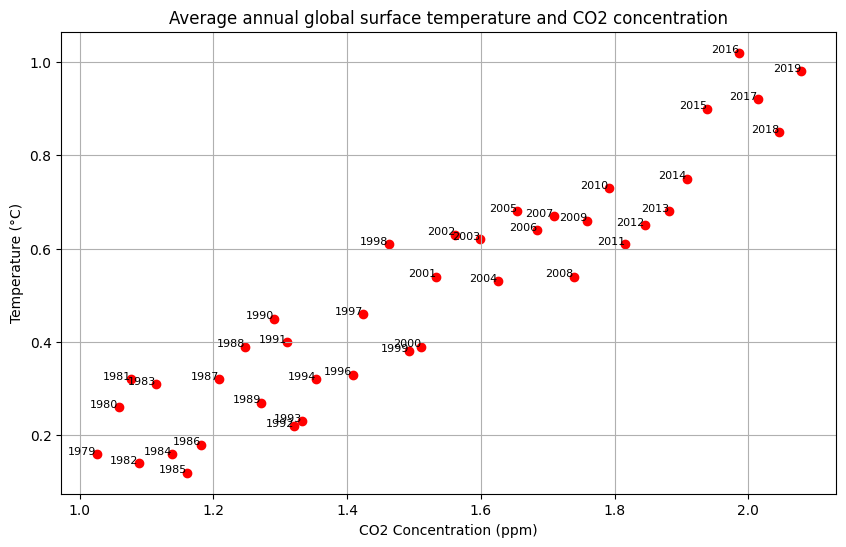

In [5]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(annual_data['CO2'], annual_data['Temp'], color='red')
plt.title('Average annual global surface temperature and CO2 concentration')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Temperature (°C)')
plt.grid(True)

# 각 데이터 포인트 옆에 연도 표시
for i in range(len(annual_data)):
    plt.text(annual_data['CO2'][i], annual_data['Temp'][i], str(annual_data['Year'][i]), fontsize=8, ha='right')

plt.show()

#### 지구 표면 온도와 대기 중 온실가스 농도는 매우 강한 양의 상관관계를 보임.

## 오존층의 오존 구멍 면적과 대기 중 오존층 파괴 물질 농도 간의 상관관계 분석

In [6]:
columns_of_interest = ['Year', 'Hole Area', 'CFC', 'HCFCs', 'HFCs'] # 관련 열 선택
oz_aggi_df = df[columns_of_interest].dropna() # 결측값 제거

annual_data = oz_aggi_df.groupby('Year').mean().reset_index() # 연도별 그룹화
annual_data

,Year,Hole Area,CFC,HCFCs,HFCs
0,1979,0.1,0.175,0.008,0.001
1,1980,1.4,0.185,0.009,0.001
2,1981,0.6,0.195,0.010,0.001
3,1982,4.8,0.205,0.011,0.001
4,1983,7.9,0.215,0.012,0.001
5,1984,10.1,0.225,0.013,0.002
6,1985,14.2,0.236,0.014,0.002
7,1986,11.3,0.247,0.015,0.002
8,1987,19.3,0.260,0.016,0.002
9,1988,10.0,0.275,0.017,0.002


In [7]:
correlation = annual_data.iloc[:, 1:].corr() # 상관계수 계산
correlation

,Hole Area,CFC,HCFCs,HFCs
Hole Area,1.000000,0.885701,0.551004,0.329000
CFC,0.885701,1.000000,0.564388,0.322299
HCFCs,0.551004,0.564388,1.000000,0.948903
HFCs,0.329000,0.322299,0.948903,1.000000


## 시각화

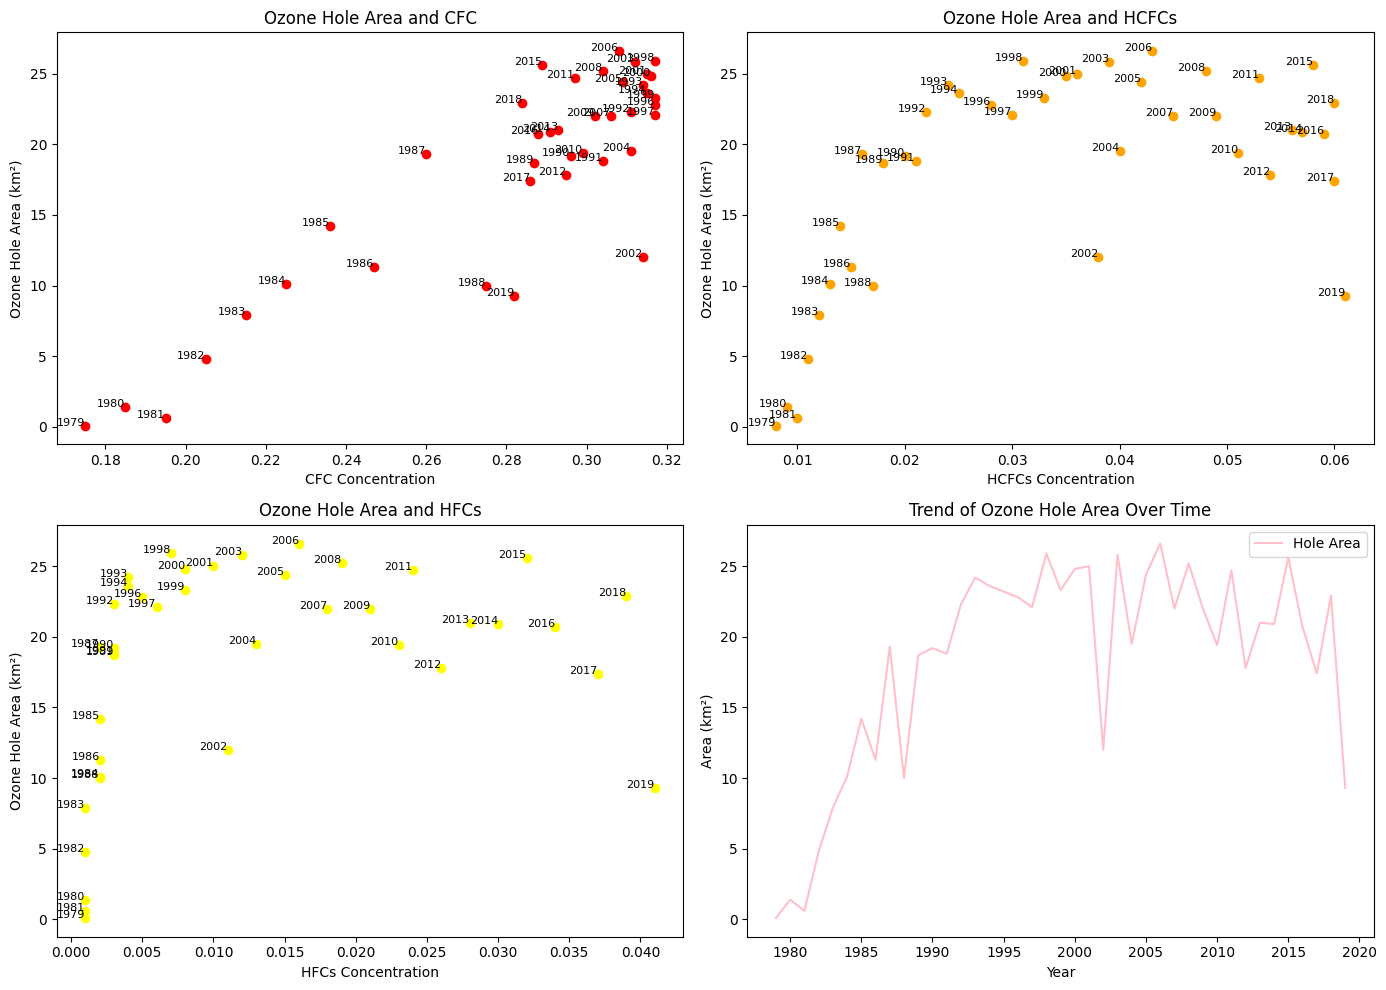

In [8]:
# 산점도 그리기
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.scatter(annual_data['CFC'], annual_data['Hole Area'], color='red')
plt.title('Ozone Hole Area and CFC')
plt.xlabel('CFC Concentration')
plt.ylabel('Ozone Hole Area (km²)')

# 연도 표시
for i in range(len(annual_data)):
    plt.text(annual_data['CFC'][i], annual_data['Hole Area'][i], str(annual_data['Year'][i]), fontsize=8, ha='right')

plt.subplot(2, 2, 2)
plt.scatter(annual_data['HCFCs'], annual_data['Hole Area'], color='orange')
plt.title('Ozone Hole Area and HCFCs')
plt.xlabel('HCFCs Concentration')
plt.ylabel('Ozone Hole Area (km²)')

# 연도 표시
for i in range(len(annual_data)):
    plt.text(annual_data['HCFCs'][i], annual_data['Hole Area'][i], str(annual_data['Year'][i]), fontsize=8, ha='right')

plt.subplot(2, 2, 3)
plt.scatter(annual_data['HFCs'], annual_data['Hole Area'], color='yellow')
plt.title('Ozone Hole Area and HFCs')
plt.xlabel('HFCs Concentration')
plt.ylabel('Ozone Hole Area (km²)')

# 연도 표시
for i in range(len(annual_data)):
    plt.text(annual_data['HFCs'][i], annual_data['Hole Area'][i], str(annual_data['Year'][i]), fontsize=8, ha='right')

# 시간에 따른 오존 구멍 면적의 변화를 시각화 (시계열 그래프)
plt.subplot(2, 2, 4)
plt.plot(annual_data['Year'], annual_data['Hole Area'], label='Hole Area', color='pink')
plt.title('Trend of Ozone Hole Area Over Time')
plt.xlabel('Year')
plt.ylabel('Area (km²)')
plt.legend()

plt.tight_layout()
plt.show()

#### CFC(염화불화탄소):
- 강한 양의 상관관계.
- 농도가 증가할 수록 오존 구멍의 면적도 증가.
#### HCFCs(하이드로클로로플루오로카본):
- 중간정도의 양의 상관관계.
- CFC에 비해 오존 구멍의 면적 증가량이 적음.
#### HFCs(하이드로플루오로카본):
- 약한 양의 상관관계.
- 오존 구멍에 미치는 영향이 대체로 적음.

## 북극 빙하 면적과 대기 중 온실가스 농도 간의 상관관계 분석

In [9]:
north_data = df[df['hemisphere'] == 'north'] # 북극 데이터
columns_of_interest = ['Year', 'CO2', 'Extent'] # 관련 열 선택
north_data = north_data[columns_of_interest].dropna() # 결측값 제거

annual_data = north_data.groupby('Year').mean().reset_index() # 연도별 그룹화
annual_data

,Year,CO2,Extent
0,1979,1.025,12.319560
1,1980,1.058,12.334148
2,1981,1.076,12.135486
3,1982,1.088,12.439445
4,1983,1.114,12.335896
5,1984,1.138,11.912601
6,1985,1.161,11.986599
7,1986,1.182,12.208224
8,1987,1.208,11.397227
9,1988,1.247,12.093169


In [10]:
correlation = annual_data.iloc[:, 1:].corr() # 상관계수 계산
correlation

,CO2,Extent
CO2,1.000000,-0.667987
Extent,-0.667987,1.000000


## 시각화

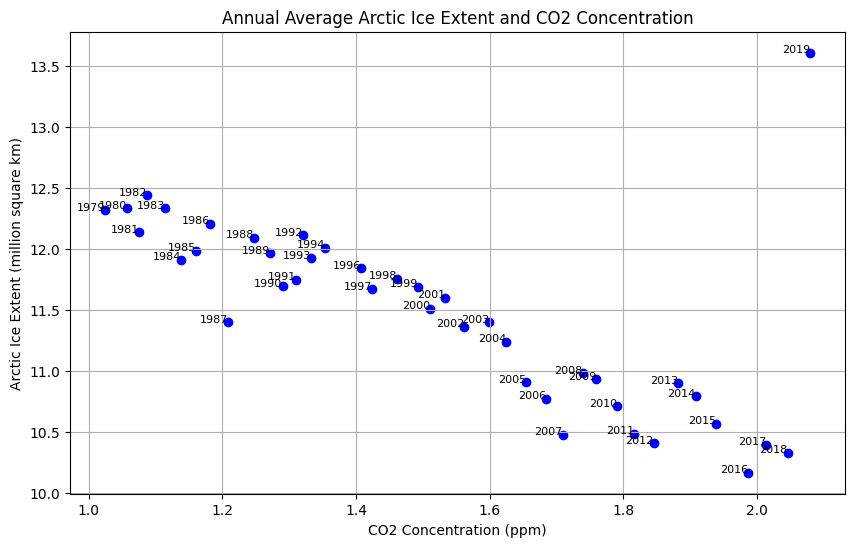

In [11]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(annual_data['CO2'], annual_data['Extent'], color='blue')
plt.title('Annual Average Arctic Ice Extent and CO2 Concentration')
plt.xlabel('CO2 Concentration (ppm)')
plt.ylabel('Arctic Ice Extent (million square km)')
plt.grid(True)

# 연도 표시
for i in range(len(annual_data)):
    plt.text(annual_data['CO2'][i], annual_data['Extent'][i], str(annual_data['Year'][i]), fontsize=8, ha='right')

plt.show()

#### 북극 빙하 면적과 대기 중 온실가스 농도는 중간 정도의 음의 상관관계를 보임.

## 남극 빙하 면적과 오존층의 오존 구멍 면적 간의 상관관계 분석

In [12]:
south_data = df[df['hemisphere'] == 'south'] # 남극 데이터
columns_of_interest = ['Year', 'Hole Area', 'Extent'] # 관련 열 선택
south_data = south_data[columns_of_interest].dropna() # 결측값 제거

annual_data = south_data.groupby('Year').mean().reset_index() # 연도별 그룹화
annual_data

,Year,Hole Area,Extent
0,1979,0.1,11.719137
1,1980,1.4,11.236290
2,1981,0.6,11.416809
3,1982,4.8,11.658066
4,1983,7.9,11.369913
5,1984,10.1,11.449678
6,1985,14.2,11.633830
7,1986,11.3,11.071322
8,1987,19.3,12.901595
9,1988,10.0,11.685189


In [13]:
correlation = annual_data.iloc[:, 1:].corr() # 상관계수 계산
correlation

,Hole Area,Extent
Hole Area,1.000000,0.279747
Extent,0.279747,1.000000


## 시각화

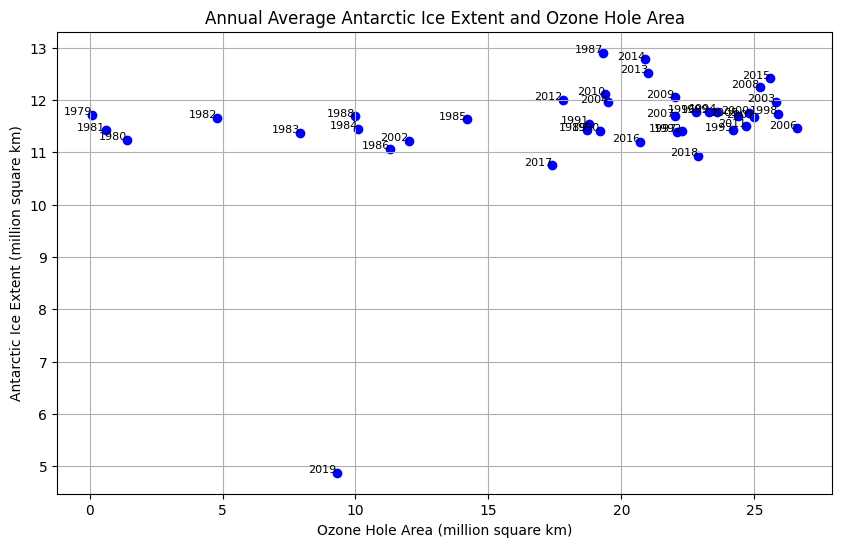

In [14]:
# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(annual_data['Hole Area'], annual_data['Extent'], color='blue')
plt.title('Annual Average Antarctic Ice Extent and Ozone Hole Area')
plt.xlabel('Ozone Hole Area (million square km)')
plt.ylabel('Antarctic Ice Extent (million square km)')
plt.grid(True)

# 연도 표시
for i in range(len(annual_data)):
    plt.text(annual_data['Hole Area'][i], annual_data['Extent'][i], str(annual_data['Year'][i]), fontsize=8, ha='right')

plt.show()

남극 빙하 면적과 오존층의 오존 구멍 면적은 상관관계가 거의 없음.